In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-11-17 13:07:34.641123: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-17 13:07:35.122451: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 13:07:35.122490: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 13:07:35.124564: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 13:07:35.329571: I tensorflow/core/platform/cpu_feature_g

In [2]:
df=pd.read_excel("preprocessed.xlsx")

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['HaveWorkedWith'], axis=1, inplace=True)
print(df.columns)

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth',
       'MainBranch', 'YearsExp', 'YearsProExp', 'PreviousSalary', 'NumSkills',
       'Employed'],
      dtype='object')


In [4]:
df.head(10)

,Age,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsExp,YearsProExp,PreviousSalary,NumSkills,Employed
0,1,1,2,1,1,1,7,4,51552,4,0
1,1,1,1,1,1,1,12,5,46482,12,1
2,1,1,2,1,1,1,15,6,77290,7,0
3,1,1,1,1,1,1,9,6,46135,13,0
4,2,1,5,0,1,2,40,30,160932,2,0
5,1,1,2,1,1,1,9,2,38915,5,0
6,2,1,2,1,1,1,26,18,77831,17,1
7,1,1,2,1,1,2,14,5,81319,4,0
8,2,1,1,1,1,1,39,21,68507,3,0
9,2,1,2,1,1,1,20,16,37752,6,0


In [5]:
def split(df, train_split=0.8, val_split=0.1, test_split=0.1):
    df_sample = df.sample(frac=1, random_state=12)
    indices_or_sections = [int(train_split * len(df)), int((1 - val_split - test_split) * len(df))]
    train, val, test = np.split(df_sample, indices_or_sections)
    return train, val, test
train, val, test=split(df, 0.9,0,0.1)
train_x=train.drop(['Employed'], axis=1)
train_y=train['Employed']

/home/vincentius/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

2023-11-17 13:07:47.133874: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-17 13:07:47.161456: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-17 13:07:47.161494: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-17 13:07:47.164208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-17 13:07:47.164237: I tensorflow/compile

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )
col_train=['Age', 'Accessibility', 'EdLevel',
       'YearsExp',
       'NumSkills']
history=model.fit(train_x[col_train], train_y,
                  validation_split = 0.15, 
                  epochs=20,
                  verbose=1
                 )

Epoch 1/20


2023-11-17 13:07:48.735795: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x559aacd97770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-17 13:07:48.735840: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-17 13:07:48.745748: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-17 13:07:48.779408: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-17 13:07:48.869412: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1757/1757 [==============================] - 11s 5ms/step - loss: 0.4922 - accuracy: 0.7651 - val_loss: 0.4711 - val_accuracy: 0.7611
Epoch 2/20
1757/1757 [==============================] - 9s 5ms/step - loss: 0.4517 - accuracy: 0.7793 - val_loss: 0.4483 - val_accuracy: 0.7811
Epoch 3/20
1757/1757 [==============================] - 9s 5ms/step - loss: 0.4508 - accuracy: 0.7792 - val_loss: 0.4492 - val_accuracy: 0.7837
Epoch 4/20
1757/1757 [==============================] - 8s 5ms/step - loss: 0.4505 - accuracy: 0.7809 - val_loss: 0.4470 - val_accuracy: 0.7842
Epoch 5/20
1757/1757 [==============================] - 9s 5ms/step - loss: 0.4496 - accuracy: 0.7802 - val_loss: 0.4459 - val_accuracy: 0.7807
Epoch 6/20
1757/1757 [==============================] - 10s 6ms/step - loss: 0.4485 - accuracy: 0.7800 - val_loss: 0.4466 - val_accuracy: 0.7834
Epoch 7/20
1757/1757 [==============================] - 12s 7ms/step - loss: 0.4488 - accuracy: 0.7807 - val_loss: 0.4443 - val_accuracy: 0.7835


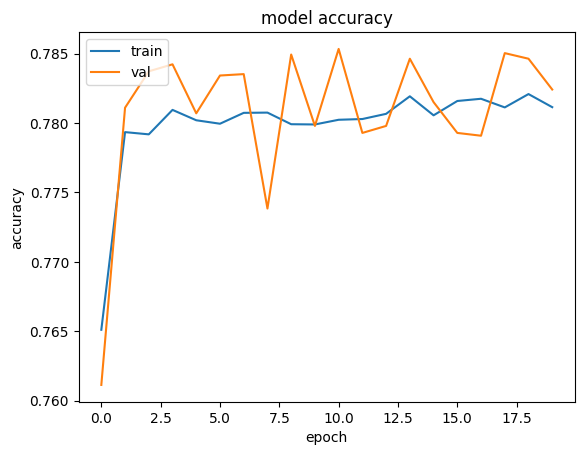

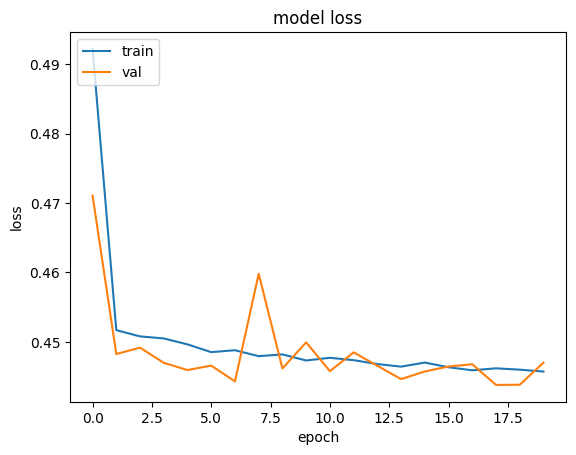

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 2)                 14        
                                                                 
Total params: 170 (680.00 Byte)
Trainable params: 170 (680.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.predict([[1,1,1,1,25]])

1/1 [==============================] - 0s 29ms/step


array([[0.05216583, 0.94783413]], dtype=float32)